# NHẬN DẠNG CHỮ CÁI VIẾT TAY
Sinh viên thực hiện: HOÀNG ANH HÙNG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Tải tập dữ liệu
df = pd.read_csv("A_Z Handwritten Data.csv")
df.columns = ['label'] + [f'pixel_{i}' for i in range(784)]

In [22]:
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


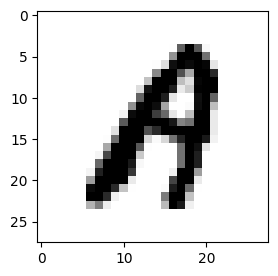

In [24]:
# chuyển mẫu (dòng 784 pixel) thành ảnh (lưới 8x8 pixel)
pixel_data = df.iloc[0].drop('label').values
image_array = pixel_data.reshape(28,28)
plt.figure(figsize=(3,3))
plt.imshow(image_array, cmap='Greys') #cmap='gray' nếu muốn nên đen chữ trắng
plt.show()

Text(0.5, 0.98, 'Tần xuất xuất hiện ký tự')

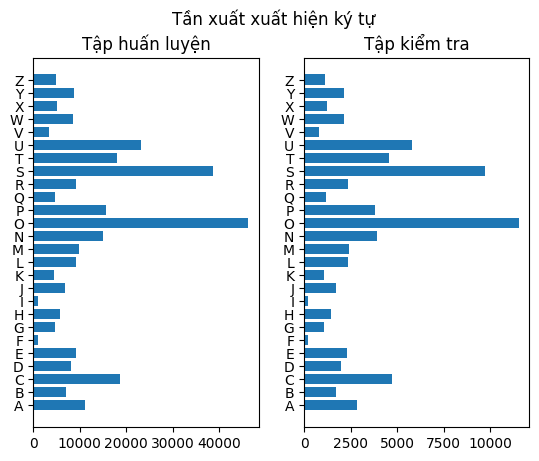

In [29]:
df = df.sample(frac=1).reset_index(drop=True) # xáo trộn mẫu, đặt lại index (không giữ lại cột index cũ)
train, test = train_test_split(df, test_size=0.2, random_state=2024)

#Trực quan hóa: số lượng dữ liệu train và test
letters = [chr(x) for x in range(65, 91)]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.barh(letters, train['label'].value_counts().sort_index())
ax1.set_title('Tập huấn luyện')
ax2.barh(letters, test['label'].value_counts().sort_index())
ax2.set_title('Tập kiểm tra')
plt.suptitle('Tần xuất xuất hiện ký tự')

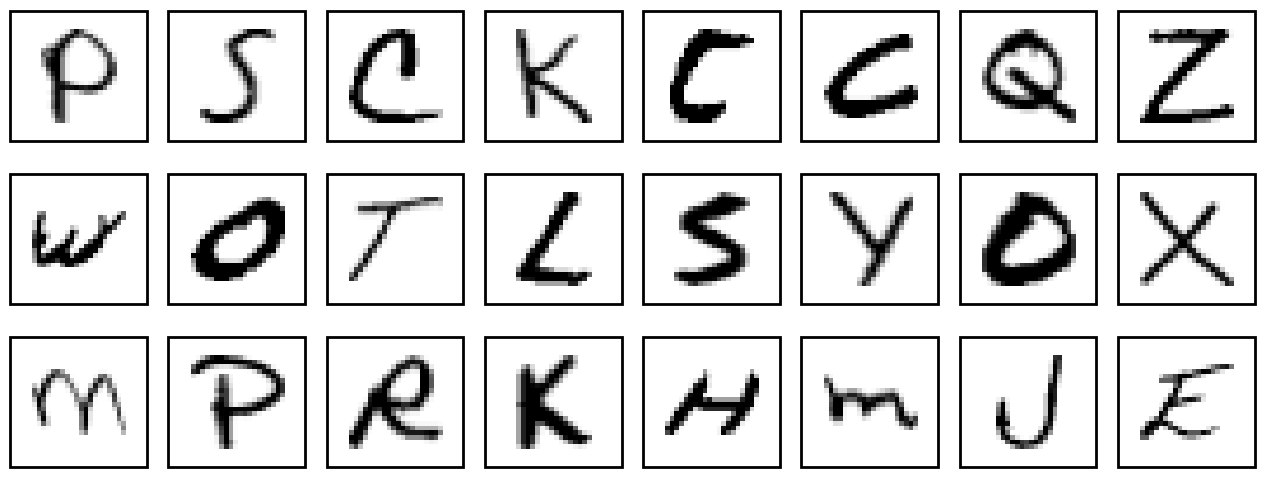

In [32]:
from matplotlib.patches import Rectangle

random_indices = np.random.choice(range(len(train)), size=24, replace=False)
_, axes = plt.subplots(3, 8, figsize=(16, 6))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(train.iloc[random_indices[i]][1:].values.reshape(28, 28), cmap='Greys')
    ax.axis('off')

    autoAxis = ax.axis()
    rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
    rec = ax.add_patch(rec)
    rec.set_clip_on(False)
plt.show()

In [33]:
X_train = train.drop('label',axis=1)
y_train = train['label']
X_test = test.drop('label',axis=1)
y_test = test['label']

In [34]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))

In [36]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
9312/9312 [==============================] - 47s 5ms/step - loss: 0.1404 - accuracy: 0.9597 - val_loss: 0.0709 - val_accuracy: 0.9803
Epoch 2/10
9312/9312 [==============================] - 42s 5ms/step - loss: 0.1356 - accuracy: 0.9614 - val_loss: 0.0837 - val_accuracy: 0.9805
Epoch 3/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.1328 - accuracy: 0.9622 - val_loss: 0.0713 - val_accuracy: 0.9812
Epoch 4/10
9312/9312 [==============================] - 42s 4ms/step - loss: 0.1298 - accuracy: 0.9628 - val_loss: 0.0742 - val_accuracy: 0.9814
Epoch 5/10
9312/9312 [==============================] - 42s 4ms/step - loss: 0.1298 - accuracy: 0.9633 - val_loss: 0.0939 - val_accuracy: 0.9813
Epoch 6/10
9312/9312 [==============================] - 43s 5ms/step - loss: 0.1258 - accuracy: 0.9638 - val_loss: 0.0873 - val_accuracy: 0.9817
Epoch 7/10
9312/9312 [==============================] - 40s 4ms/step - loss: 0.1236 - accuracy: 0.9647 - val_loss: 0.1019 - val_ac

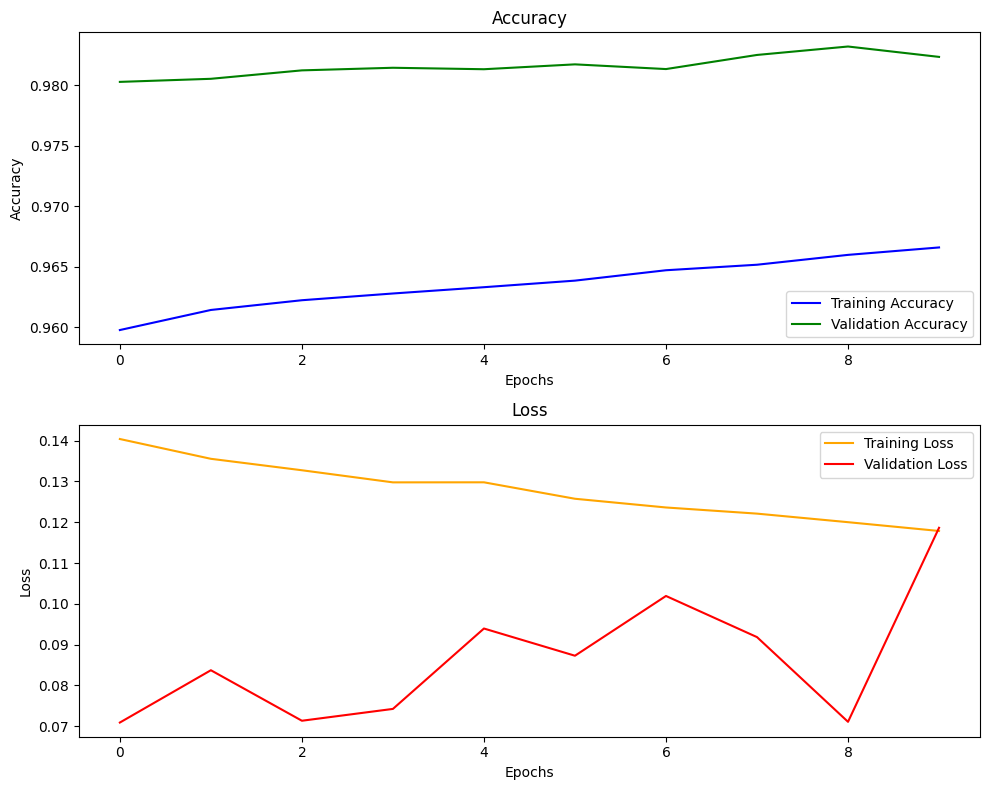

In [46]:
history_df = pd.DataFrame(history.history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(history_df['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history_df['val_accuracy'], label='Validation Accuracy', color='green')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_df['loss'], label='Training Loss', color='orange')
ax2.plot(history_df['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [38]:
model.evaluate(X_test,y_test)

2328/2328 [==============================] - 5s 2ms/step - loss: 0.0839 - accuracy: 0.9804


[0.08385415375232697, 0.9803597927093506]

In [39]:
y_pred = model.predict(X_test)

2328/2328 [==============================] - 5s 2ms/step


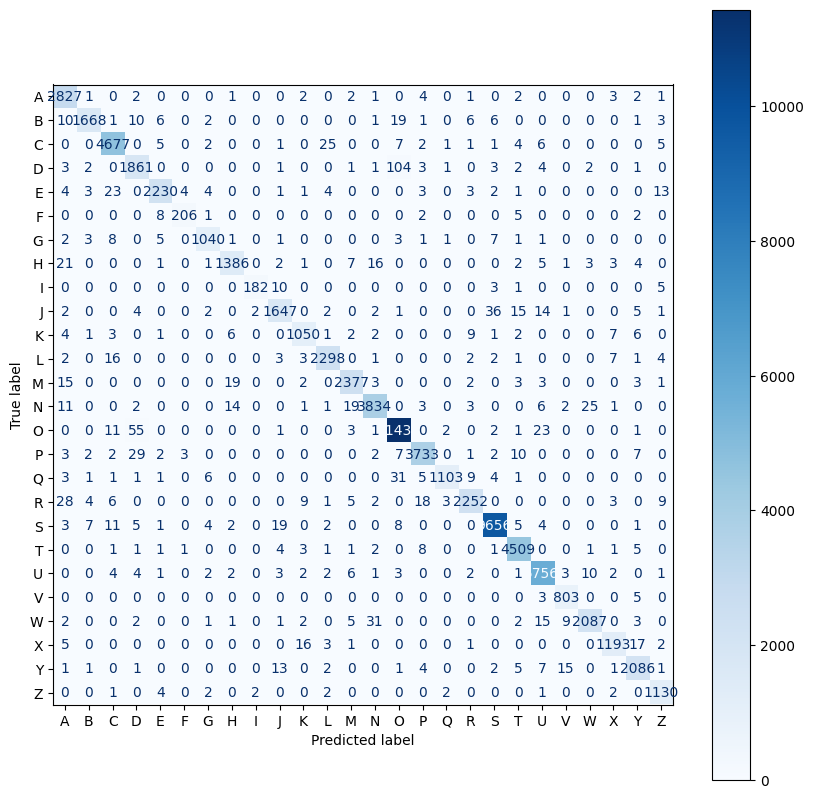

In [41]:
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes, labels=np.arange(26))
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[chr(i) for i in range(65, 91)])
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()